# Prediksi Harga Cabai Rawit Hijau Dengan Metode Bagging dan Regresi Linear

## Business Understanding


### Tujuan Proyek  



Masalah yang ingin diselesaikan:  
Fluktuasi harga cabai sering kali memengaruhi pelaku pasar, seperti petani, pedagang, atau konsumen. Prediksi harga cabai dapat membantu dalam pengambilan keputusan, seperti kapan waktu terbaik untuk menjual atau membeli.  

Tujuan utama:  
Mengembangkan model prediksi harga cabai berdasarkan tren harga sebelumnya.  



### Manfaat Bisnis  



1. Bagi Petani: 
   
    Perencanaan Panen dan Penjualan:  
    Petani dapat menjual hasil panen pada saat harga diperkirakan tinggi, sehingga meningkatkan pendapatan.  
    Menghindari penjualan saat harga diprediksi rendah.  
  
    Optimasi Penyimpanan:  
    Dengan prediksi, petani dapat memutuskan apakah perlu menyimpan cabai di gudang atau langsung menjualnya.  
  
    Perencanaan Produksi:  
    Petani dapat menyesuaikan jadwal tanam atau jenis cabai yang ditanam berdasarkan tren permintaan.  

2. Bagi Pedagang:  

    Manajemen Stok:  
    Pedagang dapat menentukan jumlah cabai yang harus dibeli atau disimpan untuk menghindari kelebihan stok saat harga turun.  
    Mengantisipasi kekurangan stok saat harga naik. 
       
    Strategi Penjualan:  
    Menentukan waktu terbaik untuk membeli dari petani dan menjual ke konsumen.  
      
    Menghindari Kerugian:  
    Prediksi harga membantu pedagang menghindari kerugian akibat fluktuasi harga yang tajam.  

3. Bagi Pembeli (Konsumen):  

    Efisiensi Belanja:  
    Konsumen dapat membeli cabai dalam jumlah lebih banyak sebelum harga naik atau mengurangi pembelian saat harga tinggi.  
    
    Perencanaan Anggaran:  
    Membantu konsumen mengatur anggaran belanja bahan makanan berdasarkan harga cabai yang diprediksi.  
    
    Pilihan Alternatif:  
    Jika harga cabai tinggi, konsumen dapat mencari bahan substitusi atau mengurangi konsumsi.

4. Bagi Pemerintah:  

    Pengendalian Inflasi:  
    Harga cabai sering menjadi komoditas yang memengaruhi inflasi. Prediksi harga dapat membantu pemerintah mengambil langkah pencegahan terhadap fluktuasi yang ekstrem.  
      
    Kebijakan Subsidi:  
    Membantu pemerintah menentukan kapan memberikan subsidi kepada petani atau konsumen untuk menjaga stabilitas harga.  

    Manajemen Pasokan:  
    Prediksi harga dapat digunakan untuk merencanakan distribusi logistik cabai antar daerah agar stok merata.  

    Informasi Publik:  
    Pemerintah dapat menggunakan prediksi harga untuk memberikan informasi kepada masyarakat, sehingga mengurangi kepanikan akibat kenaikan harga mendadak.



### KPI (Key Performance Indicators)



Akurasi Model:   
Evaluasi menggunakan metrik RMSE (Root Mean Squared Error).  
Evaluasi menggunakan metrik MAPE (Mean Absolute Percentage Error).

## Data Understanding

### Deskripsi Data



Dataset didapatkan dari sumber 
https://www.bi.go.id/hargapangan/TabelHarga/PasarTradisionalDaerah

Kolom tanggal:  
Tipe data: Datetime  
Deskripsi: Menunjukkan tanggal harga cabai tercatat.

Kolom harga:  
Tipe data: Numerik  
Deskripsi: Harga cabai pada hari tertentu (biasanya per kilogram dalam Rupiah).

## Data Preparation 

### Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Membaca Data

In [2]:
import pandas as pd

# Fungsi untuk membaca file CSV dengan pemisah opsional
def load_data(file_path, separator=';'):
    try:
        # Membaca file CSV
        data = pd.read_csv(file_path, sep=separator)
        print(f"File '{file_path}' berhasil dimuat.")
        print(f"Jumlah baris data: {len(data)}")
        return data
    except Exception as e:
        print(f"Terjadi kesalahan saat memuat file: {e}")
        return None

# Contoh penggunaan
file_path = 'C:/SEMESTER 5/PSD/UAS/Cabai/Tabel Harga Cabai.csv'  # Ganti dengan path file yang sebenarnya
data = load_data(file_path, separator=';')

# Tampilkan beberapa baris data untuk verifikasi
if data is not None:
    print(data.head())


File 'C:/SEMESTER 5/PSD/UAS/Cabai/Tabel Harga Cabai.csv' berhasil dimuat.
Jumlah baris data: 1044
      Tanggal  Harga
0  13/10/2020    3.0
1  14/10/2020    3.0
2  15/10/2020    3.0
3  16/10/2020    3.0
4  19/10/2020    3.0


Data terdiri dari 1044 data dengan 2 kolom yaitu kolom Tanggal dan kolom Harga 

### Sliding Window untuk Membentuk Data Supervised

In [3]:
# Fungsi untuk membentuk supervised data dengan sliding window
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Misalkan kita menggunakan data dari kolom harga (ubah sesuai data Anda)
series = data['Harga'].values  # Ganti 'Harga' dengan nama kolom yang relevan
window_size = 5  # Misalkan kita gunakan window size 5
X, y = create_sliding_window(series, window_size)


# Menampilkan data supervised
supervised_data = pd.DataFrame(X, columns=[f'X{i+1}' for i in range(window_size)])
supervised_data['y'] = y
print(supervised_data)


        X1    X2    X3    X4    X5     y
0      3.0   3.0   3.0   3.0   3.0   3.0
1      3.0   3.0   3.0   3.0   3.0   4.0
2      3.0   3.0   3.0   3.0   4.0   4.0
3      3.0   3.0   3.0   4.0   4.0   4.0
4      3.0   3.0   4.0   4.0   4.0   4.0
...    ...   ...   ...   ...   ...   ...
1034  15.5  15.5  15.5  15.5  15.5  15.5
1035  15.5  15.5  15.5  15.5  15.5  16.0
1036  15.5  15.5  15.5  15.5  16.0  15.5
1037  15.5  15.5  15.5  16.0  15.5  16.0
1038  15.5  15.5  16.0  15.5  16.0  16.0

[1039 rows x 6 columns]


Menggunakan 5 data harga untuk memprediksi harga selanjutnya 

### Membagi Data Menjadi Data Latih dan Data Uji

In [4]:
# Bagi data ke dalam training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Print data yang telah dibagi
print("\nX_train (Data Training):")
print(X_train[:5])  # Print 5 contoh pertama dari data training
print("\nX_test (Data Testing):")
print(X_test[:5])  # Print 5 contoh pertama dari data testing
print("\ny_train (Label Training):")
print(y_train[:5])  # Print 5 contoh pertama dari label training
print("\ny_test (Label Testing):")
print(y_test[:5])  # Print 5 contoh pertama dari label testing


X_train (Data Training):
[[3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 4.]
 [3. 3. 3. 4. 4.]
 [3. 3. 4. 4. 4.]]

X_test (Data Testing):
[[17.25 17.25 17.25 17.25 17.25]
 [17.25 17.25 17.25 17.25 17.25]
 [17.25 17.25 17.25 17.25 17.25]
 [17.25 17.25 17.25 17.25 17.25]
 [17.25 17.25 17.25 17.25 17.25]]

y_train (Label Training):
[3. 4. 4. 4. 4.]

y_test (Label Testing):
[17.25 17.25 17.25 17.25 17.  ]


Data dibagi ke dalam 70% data latih dan 30% data uji

### Memastikan Kolom Harga Berisi Data Numerik dan Tanggal Menjadi Format Datetime

In [5]:
# Pastikan kolom 'Harga' tidak mengandung karakter non-numerik
# Hapus karakter seperti koma, mata uang, dll. jika ada
data['Harga'] = data['Harga'].replace({',': '', 'Rp': ''}, regex=True)

# Mengonversi kolom 'Harga' ke tipe float
data['Harga'] = pd.to_numeric(data['Harga'], errors='coerce')

# Mengubah kolom 'Tanggal' ke format datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], dayfirst=True, errors='coerce')

# Periksa apakah konversi berhasil
print(data['Harga'].dtype)
print(data.head())

float64
     Tanggal  Harga
0 2020-10-13    3.0
1 2020-10-14    3.0
2 2020-10-15    3.0
3 2020-10-16    3.0
4 2020-10-19    3.0


### Visualisasi Grafik Harga Cabai

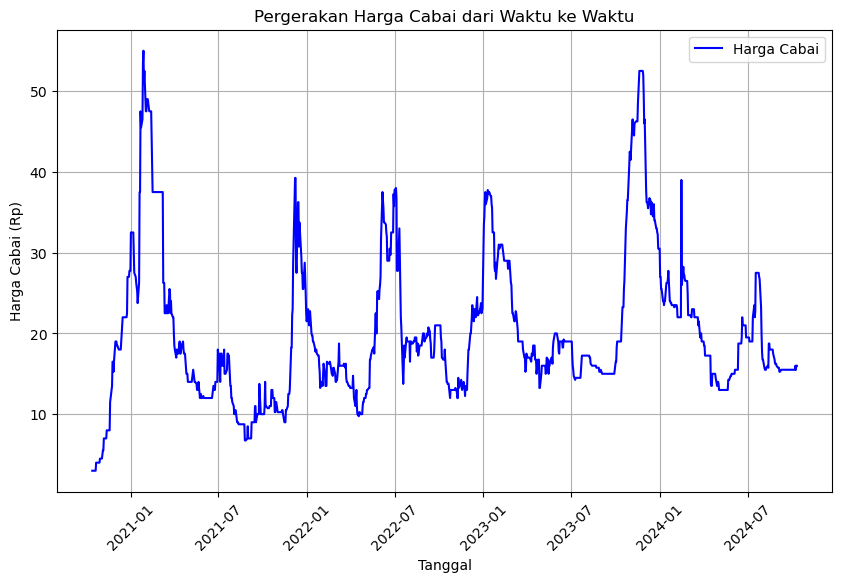

In [6]:
# Plot harga cabai dari waktu ke waktu
plt.figure(figsize=(10, 6))
plt.plot(data['Tanggal'], data['Harga'], label='Harga Cabai', color='blue')

# Menambahkan judul dan label sumbu
plt.title('Pergerakan Harga Cabai dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Harga Cabai (Rp)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Mengecek Missing Value

In [7]:
# Mengecek jumlah missing value di setiap kolom
print(data.isnull().sum())


Tanggal    0
Harga      0
dtype: int64


Tidak terdapat missing value dalam data

## Data Preprocessing

### Normalisasi Data

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Normalisasi menggunakan Min-Max Scaler
scaler = MinMaxScaler()

# Normalisasi data training
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## Data Processing

### Ensemble Bagging Dengan Model Dasar Regresi Linear

In [9]:
# Membuat model bagging dengan Linear Regression sebagai base estimator
bagging_model = BaggingRegressor(estimator=LinearRegression(), n_estimators=10, random_state=42)
bagging_model.fit(X_train_scaled, y_train)

# Prediksi menggunakan model bagging
y_pred_bagging = bagging_model.predict(X_test_scaled)

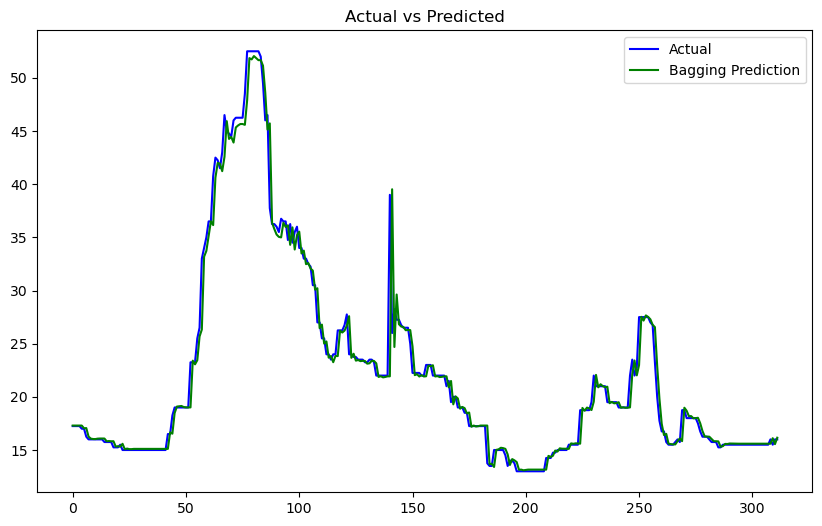

In [10]:
# Plot hasil prediksi
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred_bagging, label='Bagging Prediction', color='green')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

### Regresi Linear Sebagai Model Tunggal

In [11]:
# Model Linear Regression tunggal
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Prediksi menggunakan model linear regression
y_pred_linear = linear_model.predict(X_test_scaled)

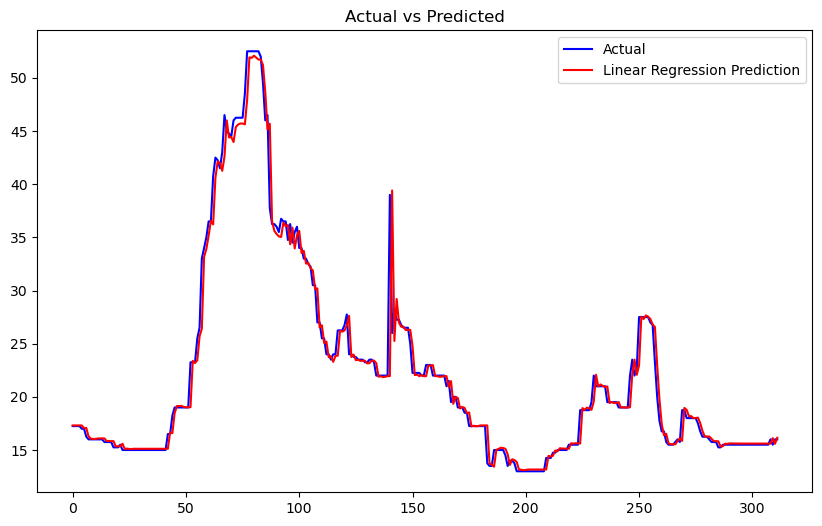

In [12]:
# Plot hasil prediksi
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred_linear, label='Linear Regression Prediction', color='red')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

### RMSE

$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$

In [13]:
# Fungsi menghitung RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# RMSE untuk model Bagging
rmse_bagging = rmse(y_test, y_pred_bagging)
print(f"RMSE Bagging: {rmse_bagging}")

# RMSE untuk model Linear Regression
rmse_linear = rmse(y_test, y_pred_linear)
print(f"RMSE Linear Regression: {rmse_linear}")


RMSE Bagging: 1.7141862374777717
RMSE Linear Regression: 1.7015281783752456


### MAPE

$\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100$


In [14]:
# Fungsi untuk menghitung MAPE
def mape(y_true, y_pred):
    # Menghindari pembagian dengan 0
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_indices = y_true != 0  # Menghindari nilai 0 pada y_true
    y_true, y_pred = y_true[non_zero_indices], y_pred[non_zero_indices]

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# MAPE untuk model Bagging
mape_bagging = mape(y_test, y_pred_bagging)
print(f"MAPE Bagging: {mape_bagging:.2f}%")

# MAPE untuk model Linear Regression
mape_linear = mape(y_test, y_pred_linear)
print(f"MAPE Linear Regression: {mape_linear:.2f}%")

MAPE Bagging: 2.79%
MAPE Linear Regression: 2.77%


### Grafik Perbandingan Prediksi Model dengan Aktual

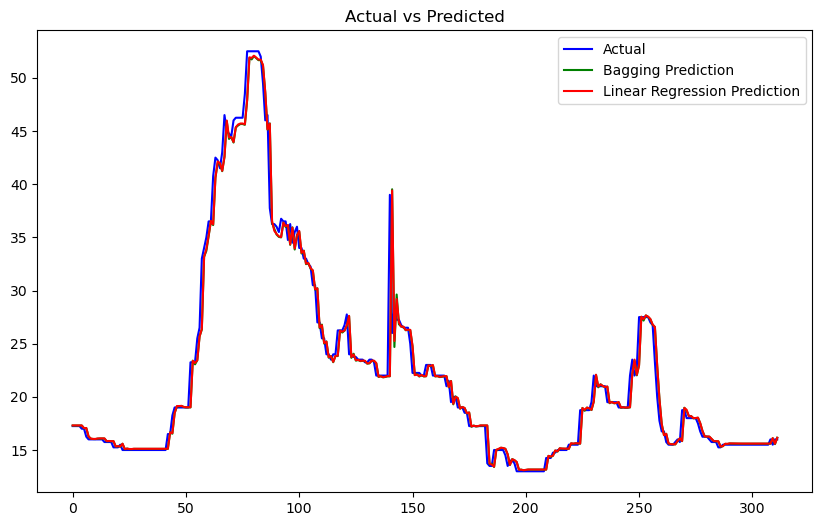

In [15]:
# Plot hasil prediksi dari kedua model
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred_bagging, label='Bagging Prediction', color='green')
plt.plot(y_pred_linear, label='Linear Regression Prediction', color='red')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()
